### 🧾 BMW Worldwide Sales Records (2010–2024)

Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


Load Dataset

In [5]:
df = pd.read_csv("bmw.csv")
df.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


Insight:
Red cars are found in both Asia and North America, but automatic transmission dominates in newer models. Most entries are classified as "Low" sales, despite varied price and engine size.

Explore the Data

In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

Insight:
Dataset contains 50,000 rows and 11 columns, representing comprehensive information on BMW models, features, and sales with no missing values.

Handle Missing & Data Cleaning

In [8]:
# Drop completely empty rows
df = df.dropna(how='all')

# Fill missing numerical values with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Final check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


Insight:
The BMW dataset is complete with 50,000 records and 11 columns, providing a rich set for analysis with no missing data.

NumPy Operations

In [12]:
sales = df['Sales_Volume'].values

print("Average Sales:", np.mean(sales))
print("Max Sales:", np.max(sales))
print("Min Sales:", np.min(sales))
print("Standard Deviation:", np.std(sales))

# Filter above-average sales
high_sales = df[np.array(sales > np.mean(sales))]
high_sales.head()


Average Sales: 5067.51468
Max Sales: 9999
Min Sales: 100
Standard Deviation: 2856.7385574155182


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
11,i8,2016,North America,Blue,Hybrid,Manual,1.9,116863,74539,8252,High


Insight:
High sales are seen in models like the 5 Series, i8, and X3 across regions, especially with manual transmission and varied fuel types; low sales are present even for newer, automatic models.

Pandas Analysis

In [17]:
# Total sales by year
sales_by_year = df.groupby('Year')['Sales_Volume'].sum().reset_index()

# Average price by fuel type
avg_price_fuel = df.groupby('Fuel_Type')['Price_USD'].mean().reset_index()

# Average price by region
avg_price_region = df.groupby('Region')['Price_USD'].mean().reset_index()

sales_by_year.head(), avg_price_fuel.head()


(   Year  Sales_Volume
 0  2010      16933445
 1  2011      16758941
 2  2012      16751895
 3  2013      16866733
 4  2014      16958960,
   Fuel_Type     Price_USD
 0    Diesel  75079.809671
 1  Electric  75276.313207
 2    Hybrid  74797.551746
 3    Petrol  74990.419841)

Insight:
BMW annual sales volume is fairly consistent from 2010 to 2014, hovering around 16.7 million units. Average prices across fuel types (Diesel, Electric, Hybrid, Petrol) are also similar, around $75,000, showing no major cost difference by fuel in this period.

Matplotlib Visualizations
a) Yearly Sales Trend

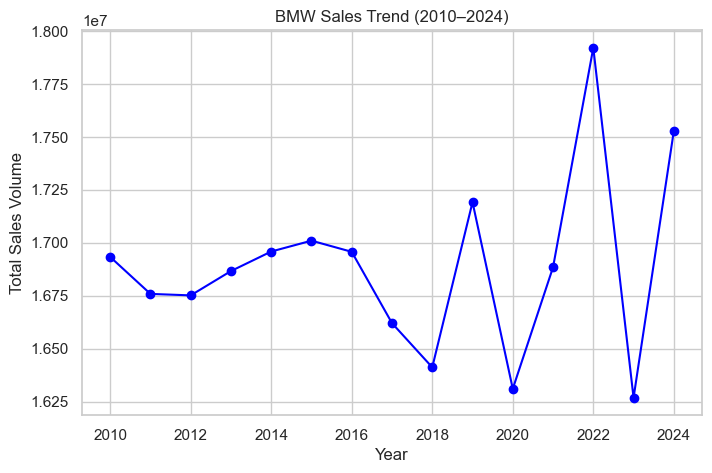

In [19]:
plt.figure(figsize=(8,5))
plt.plot(sales_by_year['Year'], sales_by_year['Sales_Volume'], marker='o', color='blue')
plt.title('BMW Sales Trend (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.show()


Insight:
BMW sales trend is mostly stable, but sharp peaks and dips appear after 2018—showing recent years have seen greater sales volatility.


Average price by region

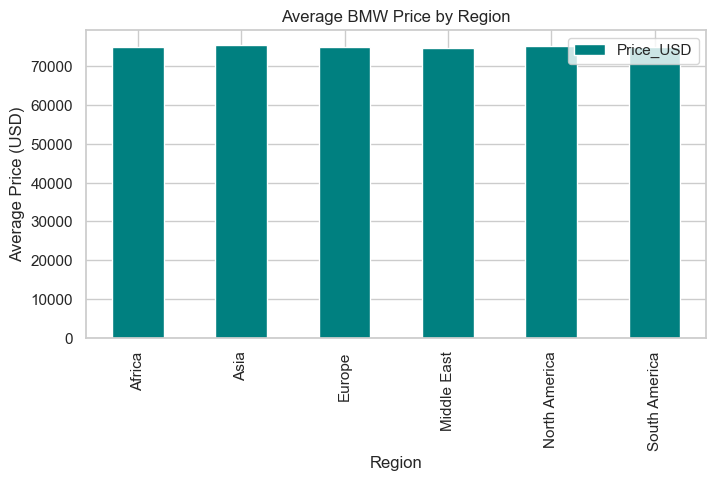

In [21]:
avg_price_region.plot(kind='bar', x='Region', y='Price_USD', color='teal', figsize=(8,4))
plt.title('Average BMW Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price (USD)')
plt.show()


Insight:
Average BMW prices are consistently high across all regions, showing minimal price variation worldwide.

Seaborn Visualizations
Sales volume distribution

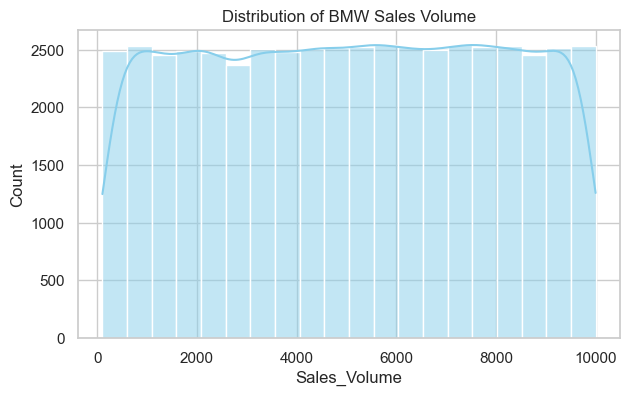

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(df['Sales_Volume'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of BMW Sales Volume')
plt.show()


Insight:BMW sales volume is evenly distributed across the entire range, with no strong peaks or dips—indicating balanced sales performance for most models.

Boxplot - Price vs Fuel Type

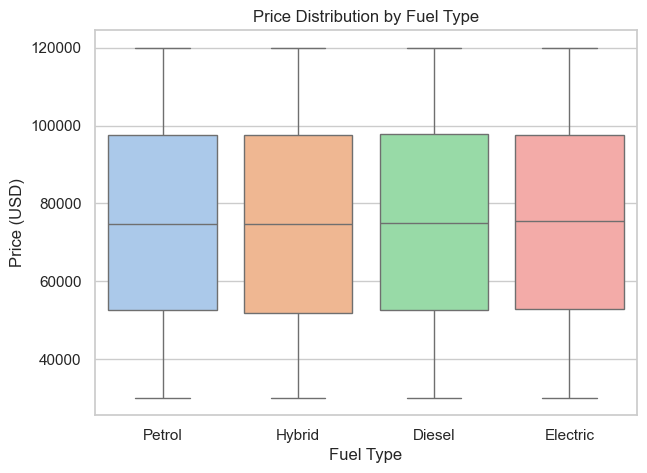

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Fuel_Type', y='Price_USD', data=df, hue='Fuel_Type', dodge=False, palette='pastel', legend=False)

plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.show()

Insight:Price ranges for BMWs are similar across all fuel types, with no significant differences between Petrol, Hybrid, Diesel, and Electric options.

Correlation heatmap

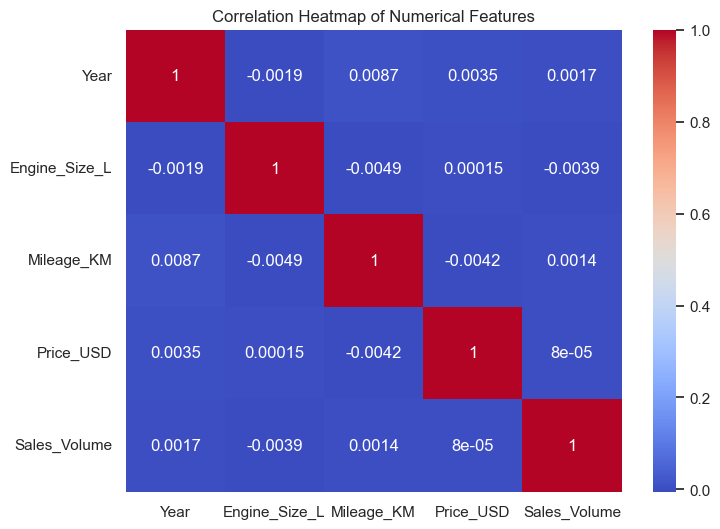

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Insight:There is little to no correlation between BMW’s numerical features—sales volume, price, mileage, year, and engine size act independently.